<a href="https://colab.research.google.com/github/AishwaryaNatarajan11/AishwaryaNatarajan11/blob/main/AfinalCodeDataJob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurations

In [ ]:
# configurations for version 2 of the recommender model
resampling = 1  # 0: no, 1: yes
add_data = 1  # 0: no, 1: yes
feature_selection_used = 0  # 0: all, 1: Cramer's V, 2: by domain knowledge
PCA_used = 0
TSNE_used = 0
LDA_used = 1  # 0: no, 1: yes
do_grid_search = 0



# Loading and Renaming


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/kaggle_survey_2020_responses.csv')
df.drop_duplicates(inplace=True)
df.drop(index=0, axis=0, inplace=True)

to_be_removed_cols = ['Time from Start to Finish (seconds)', 'Q18', 'Q19', 'Q28_A', 'Q32', 'Q34_A', 'Q26_B', 'Q27_B', 'Q28_B',
           'Q29_B', 'Q30_B', 'Q31_A', 'Q31_B', 'Q32_B', 'Q33_A', 'Q33_B', 'Q34_B', 'Q35_A', 'Q35_B']

irrelevant_questions = ['Age', 'Gender', 'Country', 'Education', 'Q21', 'Q20', 'Current yearly compensation']

names_to_be_replaced = {'Q1': 'Age', 'Q2': 'Gender', 'Q3': 'Country', 'Q4': 'Education', 'Q5': 'Role',
                 'Q6': 'Programming Experience', 'Q7_Part_1': 'Python', 'Q7_Part_2': 'R', 'Q7_Part_3': 'SQL',
                 'Q7_Part_4': 'C', 'Q7_Part_5': 'C++',
                 'Q7_Part_6': 'Java', 'Q7_Part_7': 'Javascript', 'Q7_Part_8': 'Julia', 'Q7_Part_9': 'Swift',
                 'Q7_Part_10': 'Bash', 'Q7_Part_11': 'MATLAB used', 'Q7_Part_12': 'None pr. language',
                 'Q7_OTHER': 'Other pr.languages',
                 'Q8': 'Recommended pr. language', 'Q9_Part_1': 'JupyterLab', 'Q9_Part_2': 'RStudio',
                 'Q9_Part_3': 'Visual Studio', 'Q9_Part_4': 'Visual Studio Code', 'Q9_Part_5': 'PyCharm',
                 'Q9_Part_6': 'Spyder',
                 'Q9_Part_7': 'Notepad++', 'Q9_Part_8': 'Sublime Text', 'Q9_Part_9': 'Vim / Emacs',
                 'Q9_Part_10': 'MATLAB', 'Q9_Part_11': 'No IDE', 'Q9_OTHER': 'Other IDE',
                 'Q10_Part_1': 'Kaggle Notebooks', 'Q10_Part_2': 'Colab Notebooks', 'Q10_Part_3': 'Azure Notebooks',
                 'Q10_Part_4': 'Paperspace / Gradient', 'Q10_Part_5': 'Binder / JupyterHub',
                 'Q10_Part_6': 'Code Ocean',
                 'Q10_Part_7': 'IBM Watson Studio', 'Q10_Part_8': 'Amazon Sagemaker Studio',
                 'Q10_Part_9': 'Amazon EMR Notebooks',
                 'Q10_Part_10': 'Google Cloud AI Platform Notebooks', 'Q10_Part_11': 'Google Cloud Datalab Notebooks',
                 'Q10_Part_12': 'Databricks Collaborative Notebooks', 'Q10_Part_13': 'No Notebook',
                 'Q10_OTHER': 'Other Notebook',
                 'Q11': 'computing platform used',
                 'Q12_Part_1': 'GPUs', 'Q12_Part_2': 'TPUs', 'Q12_Part_3': 'No HW', 'Q12_OTHER': 'other HW',
                 'Q13': 'usage TPU',
                 'Q14_Part_1': 'Matplotlib', 'Q14_Part_2': 'Seaborn', 'Q14_Part_3': 'Plotly / Plotly Express',
                 'Q14_Part_4': 'Ggplot / ggplot2', 'Q14_Part_5': 'Shiny', 'Q14_Part_6': 'D3js', 'Q14_Part_7': 'Altair',
                 'Q14_Part_8': 'Bokeh', 'Q14_Part_9': 'Geoplotlib', 'Q14_Part_10': 'Leaflet / Folium',
                 'Q14_Part_11': 'No libs',
                 'Q14_OTHER': 'Other libs', 'Q15': 'ML experience', 'Q16_Part_1': 'Scikit-learn',
                 'Q16_Part_2': 'Decision Trees or Random Forests',
                 'Q16_Part_3': 'Keras', 'Q16_Part_4': 'PyTorch', 'Q16_Part_5': 'Fast.ai', 'Q16_Part_6': 'MXNet',
                 'Q16_Part_7': 'Xgboost',
                 'Q16_Part_8': 'LightGBM', 'Q16_Part_9': 'CatBoost', 'Q16_Part_10': 'Prophet', 'Q16_Part_11': 'H2O3',
                 'Q16_Part_12': 'Caret', 'Q16_Part_13': 'Tidymodels', 'Q16_Part_14': 'JAX',
                 'Q16_Part_15': 'No ML framework used',
                 'Q16_OTHER': 'Other ML framework used', 'Q17_Part_1': 'Linear or Logistic Regression',
                 'Q17_Part_2': 'TensorFlow',
                 'Q17_Part_3': 'Gradient Boosting Machines', 'Q17_Part_4': 'Bayesian Approaches',
                 'Q17_Part_5': 'Evolutionary Approaches',
                 'Q17_Part_6': 'Dense Neural Networks', 'Q17_Part_7': 'Convolutional Neural Networks',
                 'Q17_Part_8': 'Generative Adversarial Networks', 'Q17_Part_9': 'Recurrent Neural Networks',
                 'Q17_Part_10': 'Transformer Networks',
                 'Q17_Part_11': 'No ML algorithm', 'Q17_OTHER': 'Other ML algorithm',
                 'Q24':'Current yearly compensation',
                 'Q25': 'Team spent on ML', 'Q26_A_Part_1': 'Amazon Web Services',
                 'Q26_A_Part_2': 'Microsoft Azure', 'Q26_A_Part_3': 'Google Cloud Platform',
                 'Q26_A_Part_11': 'No cloud pl. used',
                 'Q27_A_Part_1': 'Amazon EC2', 'Q27_A_Part_2': 'AWS Lambda',
                 'Q27_A_Part_3': 'Amazon Elastic Container Service',
                 'Q27_A_Part_4': 'Azure Cloud Services', 'Q27_A_Part_5': 'Microsoft Azure Container Instances',
                 'Q27_A_Part_6': 'Azure Functions', 'Q27_A_Part_7': 'Google Cloud Compute Engine',
                 'Q27_A_Part_8': 'Google Cloud Functions',
                 'Q27_A_Part_9': 'Google Cloud Run', 'Q27_A_Part_10': 'Google Cloud App Engine',
                 'Q27_A_Part_11': 'No cloud c. platform', 'Q27_A_OTHER': 'Other cloud c. platform',
                 'Q29_A_Part_1': 'MySQL', 'Q29_A_Part_2': 'PostgresSQL', 'Q29_A_Part_3': 'SQLite',
                 'Q29_A_Part_5': 'MongoDB',
                 'Q29_A_Part_8': 'Microsoft SQL Server', 'Q29_A_Part_17': 'No big data', 'Q30': 'Big Data Products',
                 'Q38': 'Primary Visualization tool'}


df.rename(names_to_be_replaced, axis=1, inplace=True)

print('shape: ', df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-4-7bfd0aa5ee94>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/kaggle_survey_2020_responses.csv')


shape:  (20022, 355)


In [ ]:
df.head()

,Time from Start to Finish (seconds),Age,Gender,Country,Education,Role,Programming Experience,Python,R,SQL,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizations and insights



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Age


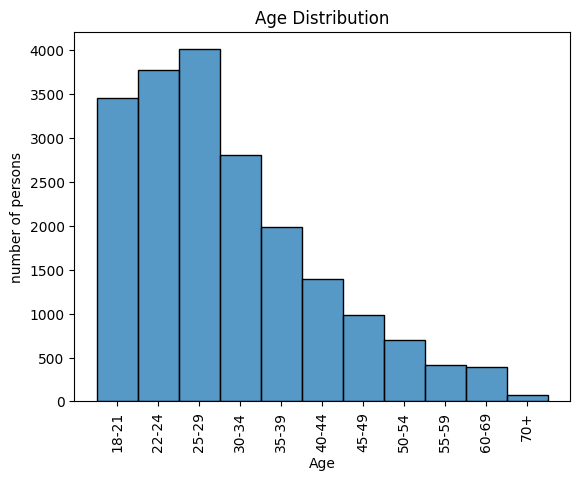

In [ ]:
sns.histplot(x=df['Age'].sort_values(ascending=True));
plt.xlabel("Age")
plt.ylabel("number of persons")
plt.title("Age Distribution")
plt.xticks(rotation = 90)
plt.show()

The survey is mostly answered by the age group between 25-29.

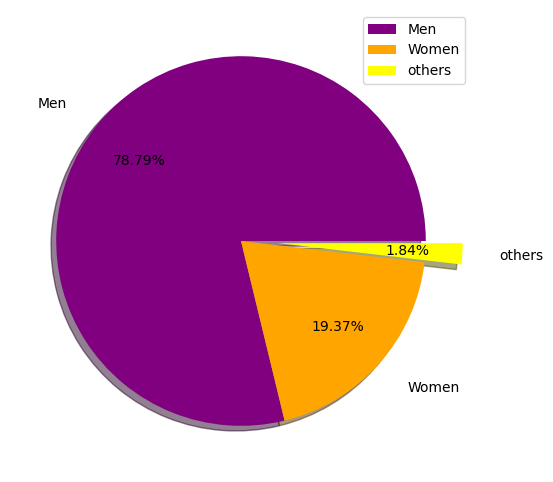

In [ ]:
# replacing gender other than man and woman into others
df['Gender'] = df['Gender'].replace(to_replace=['Man', 'Woman','Prefer to self-describe','Prefer not to say','Nonbinary'],
                                                  value=['Men', 'Women','others', 'others','others'])

#Gender count
Gender_count = df.Gender.value_counts()
Gender_count
plt.figure(figsize=(12,6))
plt.pie(x=Gender_count, labels=Gender_count.index,
        colors=['purple', 'orange', 'yellow'],
        explode = [0, 0, 0.2],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.7, labeldistance = 1.2,
        shadow = True)

plt.legend();

The survey is mostly answered by the Male gender.

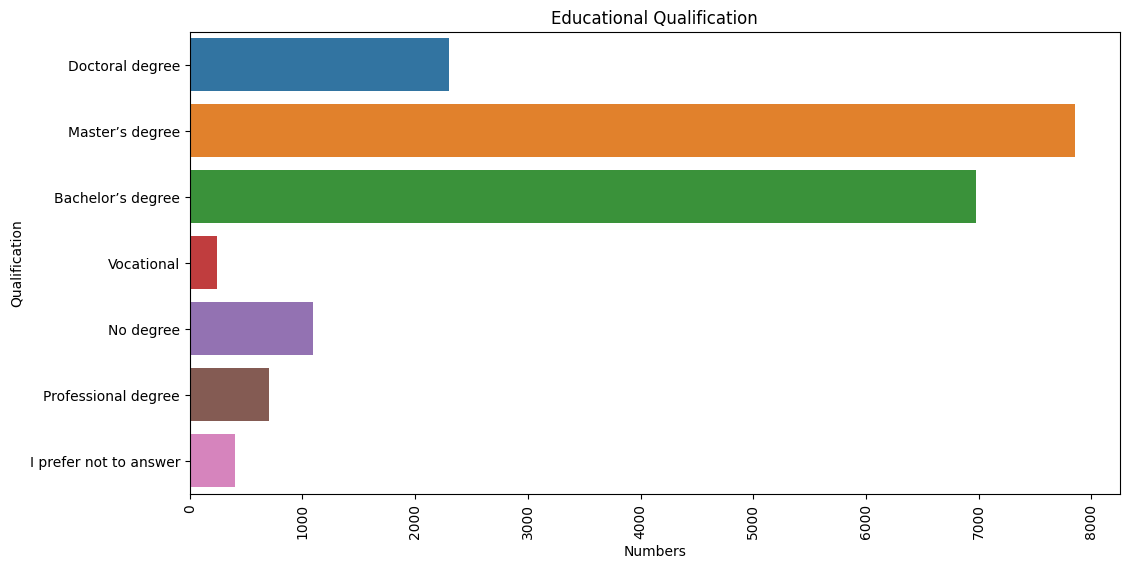

In [ ]:
df['Education'] = df['Education'].replace(to_replace=['No formal education past high school','Some college/university study without earning a bachelor’s degree' ],
                                                  value=['Vocational', 'No degree'])

#Educational level
plt.figure(figsize=(12,6))
sns.countplot(y=df.Education);
plt.xlabel("Numbers")
plt.ylabel("Qualification")
plt.title("Educational Qualification")
plt.xticks(rotation = 90);

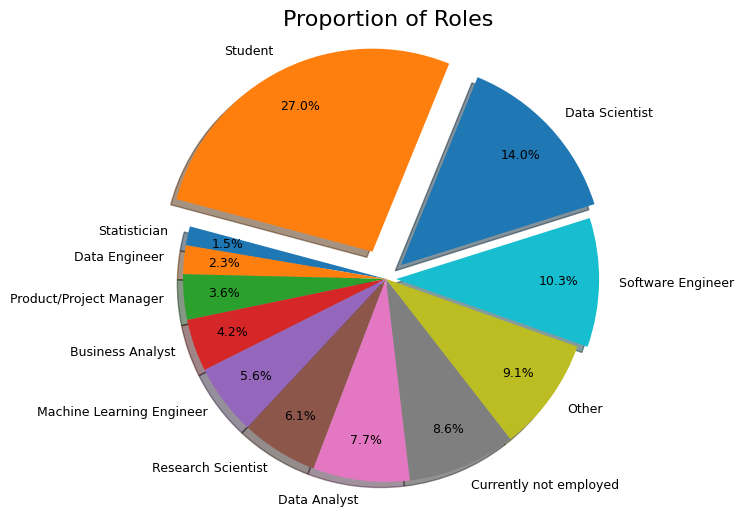

In [ ]:
#sns.set_style("dark")

df_roles = df.groupby('Role').agg({'Role': 'count'})
df_roles = df_roles.rename({'Role': 'count_of_roles'}, axis=1)
df_roles.sort_values(by='count_of_roles', ascending=True, inplace=True)
df_roles.drop(index=df_roles.index[0], axis=0, inplace=True)

plt.figure(figsize=(6, 6))
explode = np.zeros(len(df_roles)-3).tolist()
explode.extend([0.05,0.1,0.15])
plt.pie(df_roles['count_of_roles'], labels=df_roles.index, explode=explode, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1,
        shadow=True, startangle=165, textprops=dict(color="black", fontsize='9'));
plt.axis('equal')
plt.title('Proportion of Roles',fontsize=16)
plt.savefig('Pie_proportion_of_roles.png', bbox_inches='tight')

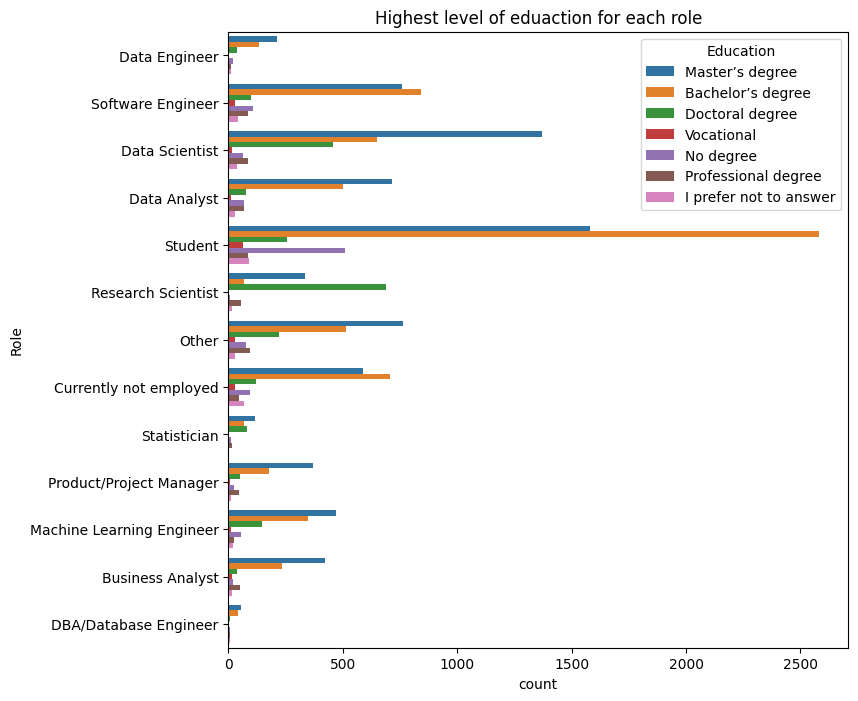

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='Role', data=df.drop(index=df.index[0], axis=0), hue='Education');
plt.title('Highest level of eduaction for each role');
plt.savefig('Level_of_eduaction_for_each_role.png', bbox_inches='tight')

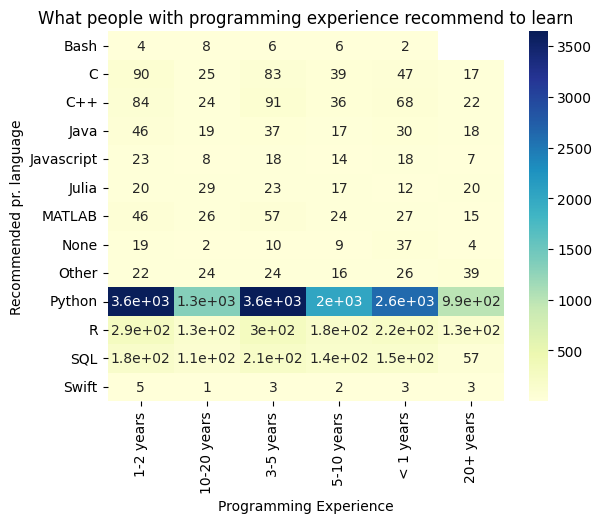

In [ ]:
counts = df.groupby(['Recommended pr. language', 'Programming Experience']).size().unstack()
sns.heatmap(counts, annot=True, cmap='YlGnBu')
plt.title('What people with programming experience recommend to learn')
plt.show()

# Preprocessing - Version 1

In [ ]:


import numpy as np

for col in to_be_removed_cols:
    df_q = df.apply(lambda t: t.name.startswith(col))
    for index in range(df.shape[1]):
        if df_q[index]:
            df.drop(df_q.index[index], axis=1, inplace=True)

# df.drop(irrelevant_questions, axis=1, inplace=True)
df1 = df[df.Role.isin(['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Business Analyst'])]
df1.reset_index(drop=True, inplace=True)
df1.Role.unique()

for index, col in enumerate(df1):
    df1.loc['Percentage of missing values', col] = round(df1[col].isna().sum()/df.shape[0], 2)

for col in df1:
    if (df1.loc['Percentage of missing values', col] > 0.8):
              df1.drop(col, axis=1, inplace=True)
print(df1.shape)

CFSA=[ 'Education','Role', 'Programming Experience', 'Python', 'R', 'SQL',
       'ML experience', 'Scikit-learn', 'Decision Trees or Random Forests',
       'Keras', 'PyTorch', 'Xgboost', 'Linear or Logistic Regression',
       'TensorFlow', 'Gradient Boosting Machines', 'Bayesian Approaches',
       'Dense Neural Networks', 'Convolutional Neural Networks',
       'Recurrent Neural Networks', 'Q23_Part_1', 'Q23_Part_2',
       'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'MySQL']#
df_n =df1[CFSA]
df_n1=df1[CFSA]

(6469, 184)


<ipython-input-11-fcd4dc95d34c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc['Percentage of missing values', col] = round(df1[col].isna().sum()/df.shape[0], 2)


# Preprocessing - Version 2

In [ ]:
import numpy as np

for col in to_be_removed_cols:
    df_q = df.apply(lambda t: t.name.startswith(col))
    for index in range(df.shape[1]):
        if df_q[index]:
            df.drop(df_q.index[index], axis=1, inplace=True)

df.drop(irrelevant_questions, axis=1, inplace=True)
df = df[df.Role.isin(['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Business Analyst'])]
df.reset_index(drop=True, inplace=True)

df['computing platform used'].replace({'A personal computer or laptop': 'pc_or_laptop',
                                        'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)': 'cloud_comp_platform',
                                        'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)': 'deep_learning_ws'},
                                        inplace=True)

# from https://towardsdatascience.com/most-in-demand-tech-skills-for-data-engineers-58f4c1ca25ab
# https://www.iibauk.org/documents/survey/basurvey2018.pdf
def add_data(data, column_name, percentage, Role):
    data[column_name] = 0
    data_engineer_rows = data[data['Role'] == Role]
    num_ones = int(len(data_engineer_rows) * percentage)
    random_indices = np.random.choice(data_engineer_rows.index, size=num_ones, replace=False)
    data.loc[random_indices, column_name] = 1

if add_data:
  add_data(df, column_name='kafka', percentage=0.26, Role='Data Engineer')
  add_data(df, column_name='spark', percentage=0.5, Role='Data Engineer')
  add_data(df, column_name='hadoop', percentage=0.42, Role='Data Engineer')
  add_data(df, column_name=' Requirements Analysis', percentage=0.93, Role='Business Analyst')

print('shape: ', df.shape)



shape:  (6468, 181)


<ipython-input-5-dddf99b63504>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['computing platform used'].replace({'A personal computer or laptop': 'pc_or_laptop',
<ipython-input-5-dddf99b63504>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = 0
<ipython-input-5-dddf99b63504>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

# Feature selection - Version 1


In [ ]:
# droping the 0 from the educational column
df_n.drop(df_n.loc[df_n['Education']==0.0].index, inplace=True)

#replacing the value in education column
df_n['Education'] = df_n['Education'].replace({'Some college/university study without earning a bachelor’s degree':'No degree',
                                           'No formal education past high school' :'No degree','I prefer not to answer' :'Not answered' })
df_n.drop(df_n.loc[df_n['Programming Experience']==0.01].index, inplace=True)

#dropping unwanted columns and replacing the value in Programming_Experience column
df_n=df_n.dropna(subset=['Programming Experience'])
df_n['Programming Experience'] = df_n['Programming Experience'].replace({'3-5 years':'0-5','1-2 years' :'0-5','5-10 years' :'5-10',
                                                                         '3-4 years':'1-5', '< 1 years':'0-5','10-20 years':'10+' ,
                                                   '20+ years':'10+','I have never written code':'0-5' })

#fillna with mode values and replacing the value in Programming_Experience column
df_n['ML experience'] =df_n['ML experience'].fillna(df_n['ML experience'].mode()[0])
df_n['ML experience'] = df_n['ML experience'].replace({'Under 1 year':'0-1','1-2 years' :'1-5','2-3 years' :'1-5', '3-4 years':'1-5', '5-10 years':'5-10','4-5 years':'1-5' ,
                                                   'I do not use machine learning methods':'0-1','10-20 years':'10+','20 or more years':'10+' })

#fillna with zero values for the binary columns
df_n = df_n.fillna('Zero')
df_n.isna().sum().sum()

<ipython-input-14-0f2b0a77c8e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.drop(df_n.loc[df_n['Education']==0.0].index, inplace=True)
<ipython-input-14-0f2b0a77c8e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['Education'] = df_n['Education'].replace({'Some college/university study without earning a bachelor’s degree':'No degree',
<ipython-input-14-0f2b0a77c8e5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

0

In [ ]:
df_n1.drop(df_n1.loc[df_n1['Education']==0.0].index, inplace=True)

#replacing the value in education column
df_n1['Education'] = df_n1['Education'].replace({'Some college/university study without earning a bachelor’s degree':'No degree',
                                           'No formal education past high school' :'No degree','I prefer not to answer' :'Not answered' })
df_n.drop(df_n.loc[df_n['Programming Experience']==0.01].index, inplace=True)

#dropping unwanted columns and replacing the value in Programming_Experience column
df_n1=df_n1.dropna(subset=['Programming Experience'])
df_n1['Programming Experience'] = df_n1['Programming Experience'].replace({'3-5 years':'0-5','1-2 years' :'0-5','5-10 years' :'5-10',
                                                                         '3-4 years':'1-5', '< 1 years':'0-5','10-20 years':'10+' ,
                                                   '20+ years':'10+','I have never written code':'0-5' })

#fillna with mode values and replacing the value in Programming_Experience column
df_n1['ML experience'] =df_n1['ML experience'].fillna(df_n['ML experience'].mode()[0])
df_n1['ML experience'] = df_n1['ML experience'].replace({'Under 1 year':'0-1','1-2 years' :'1-5','2-3 years' :'1-5', '3-4 years':'1-5', '5-10 years':'5-10','4-5 years':'1-5' ,
                                                   'I do not use machine learning methods':'0-1','10-20 years':'10+','20 or more years':'10+' })

#fillna with zero values for the binary columns
df_n1 = df_n1.fillna('Zero')
df_n1.isna().sum().sum()

<ipython-input-15-1f961fb3267f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n1.drop(df_n1.loc[df_n1['Education']==0.0].index, inplace=True)
<ipython-input-15-1f961fb3267f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n1['Education'] = df_n1['Education'].replace({'Some college/university study without earning a bachelor’s degree':'No degree',
<ipython-input-15-1f961fb3267f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

0

# Train Test Split - Version 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report

X= df_n.drop('Role', axis=1)
y =df_n['Role']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.10,
                                                random_state=42)

#Label encoding for target values
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test= le.transform(y_test)

#Ordinal Encoding for categorical values
oe = OrdinalEncoder()


cat_cols= ['Education','Programming Experience','ML experience']#

X_train[cat_cols] = oe.fit_transform(X_train[cat_cols])
X_test[cat_cols]= oe.transform(X_test[cat_cols])

#one hot encoding for binary values
oneh = OneHotEncoder(drop = 'first', sparse=False)

cat = ['Python', 'R', 'SQL', 'Scikit-learn','Decision Trees or Random Forests','Keras','PyTorch',
       'Xgboost', 'Linear or Logistic Regression',
       'TensorFlow', 'Gradient Boosting Machines', 'Bayesian Approaches',
       'Dense Neural Networks', 'Convolutional Neural Networks',
       'Recurrent Neural Networks', 'Q23_Part_1', 'Q23_Part_2',
       'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'MySQL']#

X_train[cat] = oneh.fit_transform(X_train[cat])

X_test[cat] = oneh.transform(X_test[cat])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train.head()

,Education,Programming Experience,Python,R,SQL,ML experience,Scikit-learn,Decision Trees or Random Forests,Keras,PyTorch,...,Bayesian Approaches,Dense Neural Networks,Convolutional Neural Networks,Recurrent Neural Networks,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,MySQL
1815,2.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
6189,1.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1169,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
634,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
203,3.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


# Modeling - Version 1

In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GradientBoostingClassifier test Score', clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred))
print("\n")

#Support vector machine
from sklearn import svm
clf_svm = svm.SVC().fit(X_train, y_train)

print('SVC test Score', clf.score(X_test, y_test))

y_pred = clf_svm.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred))
print("\n")
#Logistic Regression


from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()#n_neighbors=3
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

print('KNeighborsClassifier test Score', neigh.score(X_test, y_test))

y_pred = neigh.predict(X_test)
display(pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred))
print("\n")


GradientBoostingClassifier test Score 0.5101404056162246


Prediction,0,1,2,3,4
True,,,,,
0,14,45,4,29,2
1,10,80,3,50,6
2,6,5,4,22,3
3,5,36,0,191,22
4,4,11,2,49,38


              precision    recall  f1-score   support

           0       0.36      0.15      0.21        94
           1       0.45      0.54      0.49       149
           2       0.31      0.10      0.15        40
           3       0.56      0.75      0.64       254
           4       0.54      0.37      0.43       104

    accuracy                           0.51       641
   macro avg       0.44      0.38      0.39       641
weighted avg       0.49      0.51      0.48       641



SVC test Score 0.5101404056162246


Prediction,0,1,2,3,4
True,,,,,
0,0,57,2,33,2
1,0,82,1,62,4
2,0,13,1,24,2
3,1,40,0,204,9
4,2,16,0,56,30


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.39      0.55      0.46       149
           2       0.25      0.03      0.05        40
           3       0.54      0.80      0.64       254
           4       0.64      0.29      0.40       104

    accuracy                           0.49       641
   macro avg       0.36      0.33      0.31       641
weighted avg       0.42      0.49      0.43       641



KNeighborsClassifier test Score 0.42745709828393136


Prediction,0,1,2,3,4
True,,,,,
0,22,39,1,30,2
1,33,69,3,39,5
2,8,10,1,19,2
3,18,57,4,155,20
4,7,11,4,55,27


              precision    recall  f1-score   support

           0       0.25      0.23      0.24        94
           1       0.37      0.46      0.41       149
           2       0.08      0.03      0.04        40
           3       0.52      0.61      0.56       254
           4       0.48      0.26      0.34       104

    accuracy                           0.43       641
   macro avg       0.34      0.32      0.32       641
weighted avg       0.41      0.43      0.41       641





In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf_grid = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

print('GradientBoostingClassifier(grid) test Score', clf_grid.score(X_test, y_test))
y_pred = clf_grid.predict(X_test)
display(pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred))
print("\n")

from sklearn import model_selection

from sklearn.svm import SVC
model_grid = SVC(gamma= 0.001, kernel= 'linear',C=10).fit(X_train, y_train)

print('SVC(grid) test Score', model_grid.score(X_test, y_test))
y_pred = model_grid.predict(X_test)
display(pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred))
print("\n")

GradientBoostingClassifier(grid) test Score 0.5101404056162246


Prediction,0,1,2,3,4
True,,,,,
0,3,61,4,24,2
1,1,93,4,47,4
2,5,8,3,17,7
3,1,44,0,187,22
4,1,15,1,46,41


              precision    recall  f1-score   support

           0       0.27      0.03      0.06        94
           1       0.42      0.62      0.50       149
           2       0.25      0.07      0.12        40
           3       0.58      0.74      0.65       254
           4       0.54      0.39      0.46       104

    accuracy                           0.51       641
   macro avg       0.41      0.37      0.36       641
weighted avg       0.47      0.51      0.46       641



SVC(grid) test Score 0.5054602184087363


Prediction,0,1,3,4
True,,,,
0,0,65,28,1
1,1,97,50,1
2,0,16,21,3
3,1,49,190,14
4,0,21,46,37


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.39      0.65      0.49       149
           2       0.00      0.00      0.00        40
           3       0.57      0.75      0.65       254
           4       0.66      0.36      0.46       104

    accuracy                           0.51       641
   macro avg       0.32      0.35      0.32       641
weighted avg       0.42      0.51      0.44       641





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Dimension reduction methods - Version 1

# PCA - Version 1

In [ ]:
Z= df_n
# Z.head()

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report

oneh = OneHotEncoder(drop = 'first', sparse=False)

pca_cat = ['Python', 'R', 'SQL', 'Scikit-learn','Decision Trees or Random Forests','Keras','PyTorch',
       'Xgboost', 'Linear or Logistic Regression',
       'TensorFlow', 'Gradient Boosting Machines', 'Bayesian Approaches',
       'Dense Neural Networks', 'Convolutional Neural Networks',
       'Recurrent Neural Networks', 'Q23_Part_1', 'Q23_Part_2',
       'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'MySQL']#

Z[pca_cat] = oneh.fit_transform(Z[pca_cat])
oe = OrdinalEncoder()


pca_cols= ['Education','Programming Experience','ML experience', 'Role']#

Z[pca_cols] = oe.fit_transform(Z[pca_cols])



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The eigenvalues are : [1.63405976 1.49792208 0.64301556 0.44983533 0.33333678 0.29955128
 0.26536621 0.21345016 0.19200533 0.18579253 0.1692216  0.16403521
 0.1460971  0.14455172 0.12914619 0.12418783 0.11240823 0.11026832
 0.10380285 0.09675654 0.09383676 0.07977093 0.07162543 0.06714491]


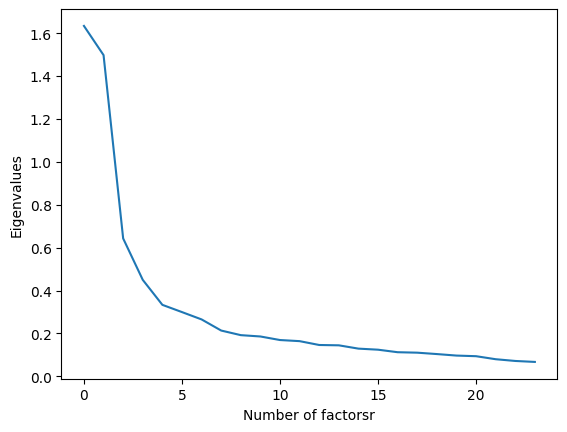

The ratios are : [0.2230132  0.2044334  0.08775747 0.06139262 0.04549313 0.04088216
 0.03621665 0.02913125 0.0262045  0.02535659 0.02309502 0.0223872
 0.01993904 0.01972813 0.01762561 0.01694891 0.01534125 0.0150492
 0.0141668  0.01320514 0.01280665 0.01088698 0.00977529 0.0091638 ]


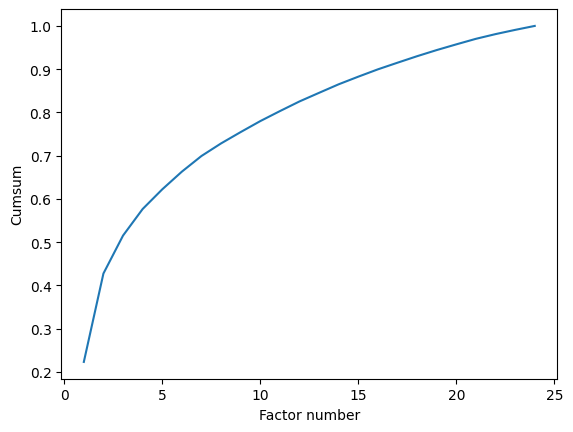

In [ ]:
target_n = Z.Role
Z_pca=Z.drop('Role', axis=1)


from sklearn.decomposition import PCA
pca = PCA()

X_reduced = pca.fit_transform(Z_pca)

Coord = pca.fit_transform(Z_pca)
print('The eigenvalues are :', pca.explained_variance_)
plt.plot(range(0, 24), pca.explained_variance_)
plt.xlabel('Number of factorsr')
plt.ylabel('Eigenvalues')
plt.show()

print('The ratios are :', pca.explained_variance_ratio_)
# Graphe de la somme cumulative de la variance expliquée
plt.plot(np.arange(1, 25), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Factor number')
plt.ylabel('Cumsum')
plt.show()



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_reduced = pca.fit_transform(Z_pca)
from sklearn.ensemble import GradientBoostingClassifier
clf_pca = GradientBoostingClassifier()
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced, target_n)
clf_pca.fit(X_train_pca,y_train_pca)
print('GradientBoostingClassifier pca',clf_pca.score(X_test_pca, y_test_pca))
print("/n")
y_pred = clf_pca.predict(X_test_pca)
display(pd.crosstab(y_test_pca,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test_pca, y_pred))

GradientBoostingClassifier pca 0.47845096814490945
/n


Prediction,0.0,1.0,2.0,3.0,4.0
True,,,,,
0.0,22,87,2,59,2
1.0,16,184,5,167,7
2.0,3,28,1,65,2
3.0,8,100,1,555,15
4.0,4,48,2,214,4


              precision    recall  f1-score   support

         0.0       0.42      0.13      0.20       172
         1.0       0.41      0.49      0.45       379
         2.0       0.09      0.01      0.02        99
         3.0       0.52      0.82      0.64       679
         4.0       0.13      0.01      0.03       272

    accuracy                           0.48      1601
   macro avg       0.31      0.29      0.26      1601
weighted avg       0.39      0.48      0.40      1601



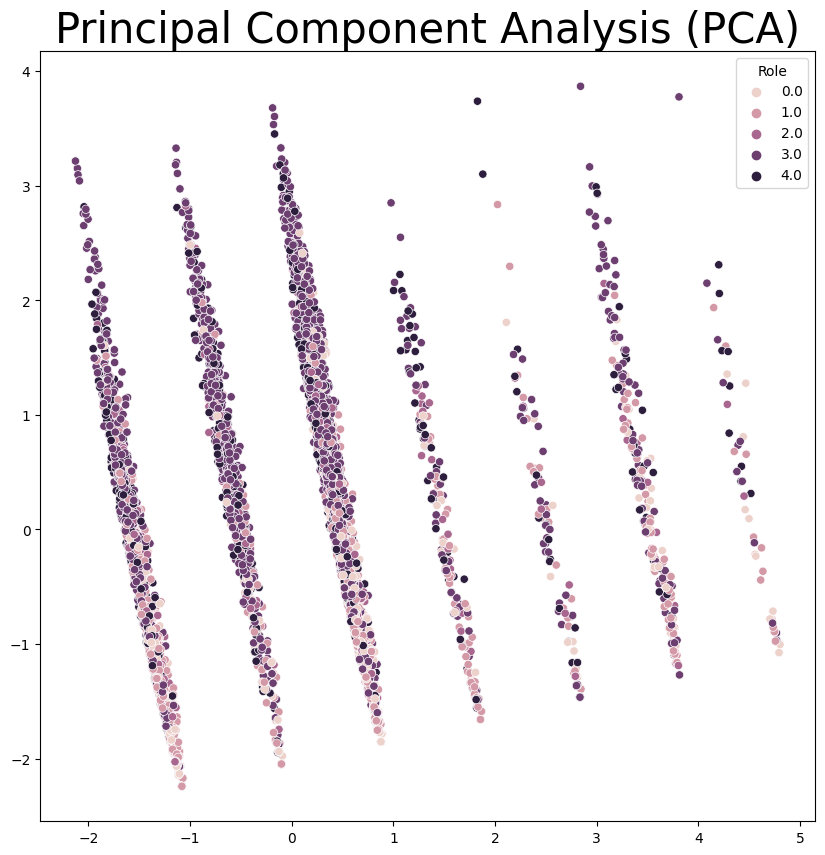

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=target_n)
plt.title("Principal Component Analysis (PCA)", fontsize=30)
plt.show()

# LDA-Version 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report

Z_LDA= df_n

X_LDA = Z_LDA.drop('Role', axis=1)

Y_LDA = Z_LDA['Role']


#Label Encoding
le = LabelEncoder()
Y_LDA = le.fit_transform(Y_LDA)

#Ordinal Encoder
oe = OrdinalEncoder()
cat_cols= ['Education','Programming Experience','ML experience']#
X_LDA[cat_cols] = oe.fit_transform(X_LDA[cat_cols])

#One Hot Encoder
oneh = OneHotEncoder(drop = 'first', sparse=False)
cat = ['Python', 'R', 'SQL', 'Scikit-learn','Decision Trees or Random Forests','Keras','PyTorch',
       'Xgboost', 'Linear or Logistic Regression',
       'TensorFlow', 'Gradient Boosting Machines', 'Bayesian Approaches',
       'Dense Neural Networks', 'Convolutional Neural Networks',
       'Recurrent Neural Networks', 'Q23_Part_1', 'Q23_Part_2',
       'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5',  'MySQL']
X_LDA[cat] = oneh.fit_transform(X_LDA[cat])




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Modeling - Version 1

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_LDA = lda.fit_transform(X_LDA, Y_LDA)

In [ ]:
X_train_LDA,X_test_LDA,y_train_LDA,y_test_LDA = train_test_split(X_LDA, Y_LDA, test_size=0.10,
                                                random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_LDA = lda.fit_transform(X_LDA, Y_LDA)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf_lda=LDA(n_components=2)
clf_lda.fit(X_train_LDA,y_train_LDA)
print('LDA test set', clf_lda.score(X_test_LDA, y_test_LDA))
y_pred = clf_lda.predict(X_test_LDA)
display(pd.crosstab(y_test_LDA,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test_LDA, y_pred))

from sklearn.ensemble import GradientBoostingClassifier
clf_lda = GradientBoostingClassifier()
clf_lda.fit(X_train_LDA,y_train_LDA)
print('GradientBoostingClassifier LDA',clf_lda.score(X_test_LDA, y_test_LDA))
y_pred = clf_lda.predict(X_test_LDA)
display(pd.crosstab(y_test_LDA,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test_LDA, y_pred))

from sklearn import svm
svm_lda = svm.SVC()
svm_lda.fit(X_train_LDA,y_train_LDA)
print('SVM LDA',svm_lda.score(X_test_LDA, y_test_LDA))
y_pred = svm_lda.predict(X_test_LDA)
display(pd.crosstab(y_test_LDA,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test_LDA, y_pred))


from sklearn.neighbors import KNeighborsClassifier
neigh_lda = KNeighborsClassifier()#n_neighbors=3
neigh_lda.fit(X_train_LDA,y_train_LDA)
print('KNeighborsClassifier LDA test Score', neigh_lda.score(X_test_LDA, y_test_LDA))
y_pred = neigh_lda.predict(X_test_LDA)
display(pd.crosstab(y_test_LDA,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test_LDA, y_pred))
print("\n")



LDA test set 0.5132605304212169


Prediction,0,1,2,3,4
True,,,,,
0,12,52,3,25,2
1,12,82,6,44,5
2,6,8,4,19,3
3,9,38,2,186,19
4,5,15,1,38,45


              precision    recall  f1-score   support

           0       0.27      0.13      0.17        94
           1       0.42      0.55      0.48       149
           2       0.25      0.10      0.14        40
           3       0.60      0.73      0.66       254
           4       0.61      0.43      0.51       104

    accuracy                           0.51       641
   macro avg       0.43      0.39      0.39       641
weighted avg       0.49      0.51      0.49       641

GradientBoostingClassifier LDA 0.5023400936037441


Prediction,0,1,2,3,4
True,,,,,
0,9,52,1,31,1
1,10,78,3,52,6
2,2,8,4,24,2
3,9,33,3,188,21
4,4,8,1,48,43


              precision    recall  f1-score   support

           0       0.26      0.10      0.14        94
           1       0.44      0.52      0.48       149
           2       0.33      0.10      0.15        40
           3       0.55      0.74      0.63       254
           4       0.59      0.41      0.49       104

    accuracy                           0.50       641
   macro avg       0.43      0.37      0.38       641
weighted avg       0.47      0.50      0.47       641

SVM LDA 0.5101404056162246


Prediction,0,1,2,3,4
True,,,,,
0,4,53,0,36,1
1,3,83,0,62,1
2,1,11,1,25,2
3,1,34,1,203,15
4,0,14,1,53,36


              precision    recall  f1-score   support

           0       0.44      0.04      0.08        94
           1       0.43      0.56      0.48       149
           2       0.33      0.03      0.05        40
           3       0.54      0.80      0.64       254
           4       0.65      0.35      0.45       104

    accuracy                           0.51       641
   macro avg       0.48      0.35      0.34       641
weighted avg       0.50      0.51      0.45       641

KNeighborsClassifier LDA test Score 0.43837753510140404


Prediction,0,1,2,3,4
True,,,,,
0,18,38,3,31,4
1,37,69,8,28,7
2,9,12,3,13,3
3,21,44,6,159,24
4,10,7,4,51,32


              precision    recall  f1-score   support

           0       0.19      0.19      0.19        94
           1       0.41      0.46      0.43       149
           2       0.12      0.07      0.09        40
           3       0.56      0.63      0.59       254
           4       0.46      0.31      0.37       104

    accuracy                           0.44       641
   macro avg       0.35      0.33      0.34       641
weighted avg       0.43      0.44      0.43       641





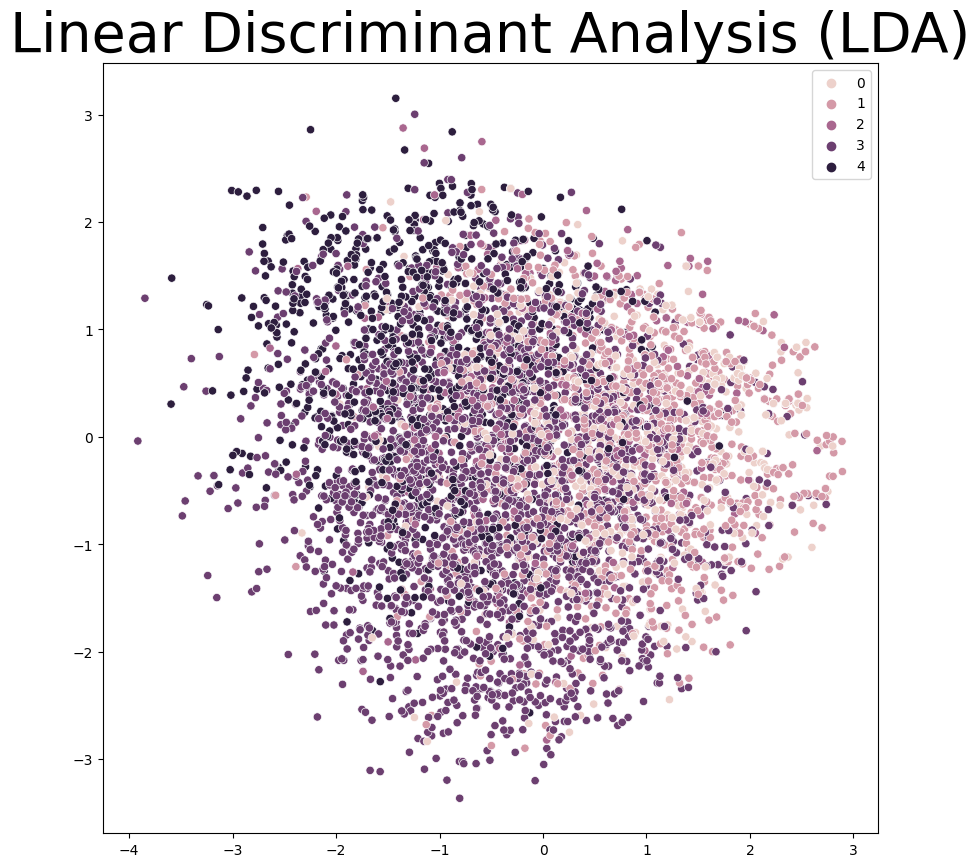

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_LDA[:,0], y=X_LDA[:,1], hue=Y_LDA)
plt.title("Linear Discriminant Analysis (LDA)", fontsize=40)
plt.show()





# with DA,DS,MLE as the target values - Version 1


In [ ]:

Z_LDA1 = df_n1[df_n1.Role.isin(['Data Scientist', 'Data Analyst','Machine Learning Engineer'])]
Z_LDA1.reset_index(drop=True, inplace=True)

In [ ]:

X_LDA1 = Z_LDA1.drop('Role', axis=1)

Y_LDA1 = Z_LDA1['Role']

#Label Encoding
le = LabelEncoder()
Y_LDA1 = le.fit_transform(Y_LDA1)

#Ordinal Encoder
oe = OrdinalEncoder()
cat_cols= ['Education','Programming Experience','ML experience']#
X_LDA1[cat_cols] = oe.fit_transform(X_LDA1[cat_cols])

#One Hot Encoder
oneh = OneHotEncoder(drop = 'first', sparse=False)
cat = ['Python', 'R', 'SQL', 'Scikit-learn','Decision Trees or Random Forests','Keras','PyTorch',
       'Xgboost', 'Linear or Logistic Regression',
       'TensorFlow', 'Gradient Boosting Machines', 'Bayesian Approaches',
       'Dense Neural Networks', 'Convolutional Neural Networks',
       'Recurrent Neural Networks','Q23_Part_1', 'Q23_Part_2',
       'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'MySQL']
X_LDA1[cat] = oneh.fit_transform(X_LDA1[cat])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


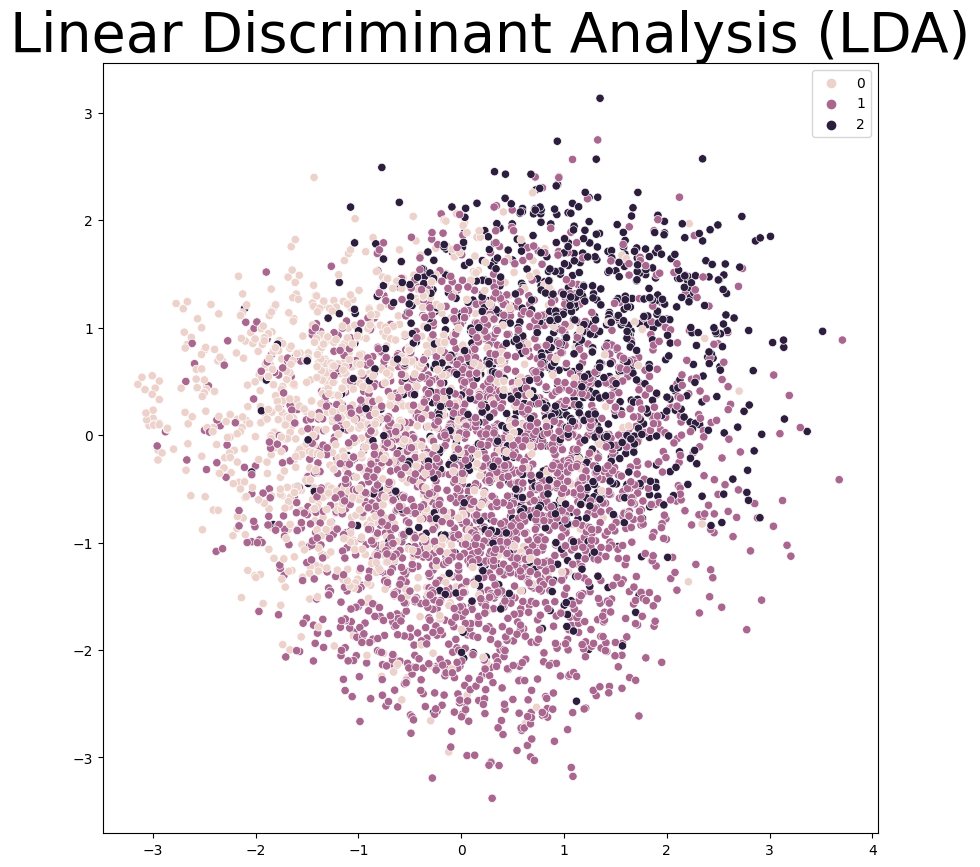

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_LDA1 = lda.fit_transform(X_LDA1, Y_LDA1)

plt.figure(figsize=(10,10))
sns.scatterplot(x=X_LDA1[:,0], y=X_LDA1[:,1], hue=Y_LDA1)
plt.title("Linear Discriminant Analysis (LDA)", fontsize=40)
plt.show()

# Modeling - Version 1

In [ ]:
X_train_LDA,X_test_LDA,y_train_LDA,y_test_LDA = train_test_split(X_LDA1, Y_LDA1, test_size=0.10,
                                                random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf=LDA()
clf.fit(X_train_LDA,y_train_LDA)
print('LDA test set', clf.score(X_test_LDA, y_test_LDA))
y_pred = clf.predict(X_test_LDA)
display(pd.crosstab(y_test_LDA,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test_LDA, y_pred))


from sklearn.ensemble import GradientBoostingClassifier
clf_lda = GradientBoostingClassifier()
clf_lda.fit(X_train_LDA,y_train_LDA)
print('GradientBoostingClassifier LDA',clf_lda.score(X_test_LDA, y_test_LDA))
y_pred = clf_lda.predict(X_test_LDA)
display(pd.crosstab(y_test_LDA,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test_LDA, y_pred))

from sklearn.neighbors import KNeighborsClassifier
neigh_lda = KNeighborsClassifier()#n_neighbors=3
neigh_lda.fit(X_train_LDA,y_train_LDA)
print('KNeighborsClassifier LDA test Score', neigh_lda.score(X_test_LDA, y_test_LDA))
y_pred = neigh_lda.predict(X_test_LDA)
display(pd.crosstab(y_test_LDA,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test_LDA, y_pred))
print("\n")

from sklearn.ensemble import GradientBoostingClassifier
clf_lda1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_LDA,y_train_LDA)
print('GradientBoostingClassifier(grid) test Score', clf_lda1.score(X_test_LDA, y_test_LDA))
y_pred = clf_lda1.predict(X_test_LDA)
display(pd.crosstab(y_test_LDA,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test_LDA, y_pred))

from sklearn import svm
svm_lda = svm.SVC()
svm_lda.fit(X_train_LDA,y_train_LDA)
print('SVM LDA',svm_lda.score(X_test_LDA, y_test_LDA))
y_pred = svm_lda.predict(X_test_LDA)
display(pd.crosstab(y_test_LDA,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test_LDA, y_pred))

from sklearn import model_selection
from sklearn.svm import SVC
model_lda = SVC(gamma= 0.001, kernel= 'linear',C=10).fit(X_train_LDA,y_train_LDA)
print('SVC(grid) test Score', 'SVM LDA',model_lda.score(X_test_LDA, y_test_LDA))
y_pred = model_lda.predict(X_test_LDA)
display(pd.crosstab(y_test_LDA,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test_LDA, y_pred))

LDA test set 0.6204238921001927


Prediction,0,1,2
True,,,
0,81,67,7
1,46,199,17
2,14,46,42


              precision    recall  f1-score   support

           0       0.57      0.52      0.55       155
           1       0.64      0.76      0.69       262
           2       0.64      0.41      0.50       102

    accuracy                           0.62       519
   macro avg       0.62      0.56      0.58       519
weighted avg       0.62      0.62      0.61       519

GradientBoostingClassifier LDA 0.6242774566473989


Prediction,0,1,2
True,,,
0,77,71,7
1,40,207,15
2,14,48,40


              precision    recall  f1-score   support

           0       0.59      0.50      0.54       155
           1       0.63      0.79      0.70       262
           2       0.65      0.39      0.49       102

    accuracy                           0.62       519
   macro avg       0.62      0.56      0.58       519
weighted avg       0.62      0.62      0.61       519

KNeighborsClassifier LDA test Score 0.5703275529865125


Prediction,0,1,2
True,,,
0,80,71,4
1,55,189,18
2,19,56,27


              precision    recall  f1-score   support

           0       0.52      0.52      0.52       155
           1       0.60      0.72      0.65       262
           2       0.55      0.26      0.36       102

    accuracy                           0.57       519
   macro avg       0.56      0.50      0.51       519
weighted avg       0.57      0.57      0.56       519



GradientBoostingClassifier(grid) test Score 0.6107899807321773


Prediction,0,1,2
True,,,
0,80,67,8
1,44,194,24
2,13,46,43


              precision    recall  f1-score   support

           0       0.58      0.52      0.55       155
           1       0.63      0.74      0.68       262
           2       0.57      0.42      0.49       102

    accuracy                           0.61       519
   macro avg       0.60      0.56      0.57       519
weighted avg       0.61      0.61      0.60       519

SVM LDA 0.6223506743737958


Prediction,0,1,2
True,,,
0,74,75,6
1,37,216,9
2,10,59,33


              precision    recall  f1-score   support

           0       0.61      0.48      0.54       155
           1       0.62      0.82      0.71       262
           2       0.69      0.32      0.44       102

    accuracy                           0.62       519
   macro avg       0.64      0.54      0.56       519
weighted avg       0.63      0.62      0.60       519

SVC(grid) test Score SVM LDA 0.6242774566473989


Prediction,0,1,2
True,,,
0,79,70,6
1,42,209,11
2,11,55,36


              precision    recall  f1-score   support

           0       0.60      0.51      0.55       155
           1       0.63      0.80      0.70       262
           2       0.68      0.35      0.46       102

    accuracy                           0.62       519
   macro avg       0.63      0.55      0.57       519
weighted avg       0.63      0.62      0.61       519



# **Multiclass classification Version 2** (preprocessing done at the beginning)

# Feature selection by Cramer's V - Version 2

---



In [ ]:
if feature_selection_used == 1:

  import scipy.stats as stats
  import numpy as np
  from scipy.stats import chi2_contingency

  categorical = ['Recommended pr. language', 'Programming Experience',
                'ML experience', 'Team spent on ML']

  # replace missing values
  df_forFeatSelection = df[df.Role.isin(['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Business Analyst'])]

  modes = df_forFeatSelection[categorical].apply(lambda c: c.mode()[0])

  for c in categorical:
      df_forFeatSelection[c].fillna(modes[c], inplace=True)

  df_forFeatSelection.fillna(0, inplace=True)
  target_variable = 'Role'
  feature_associations = {}
  features_cramersv = []

  for feature in df.columns:
      if feature != target_variable:
          contingency_table = pd.crosstab(df_forFeatSelection[feature], df_forFeatSelection[target_variable])

          # Perform chi-square test and calculate Cramér's V
          chi2, _, _, _ = chi2_contingency(contingency_table)
          n = contingency_table.sum().sum()
          phi2 = chi2 / n
          r, k = contingency_table.shape
          phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
          rcorr = r - ((r - 1) ** 2) / (n - 1)
          kcorr = k - ((k - 1) ** 2) / (n - 1)
          cramers_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

          feature_associations[feature] = cramers_v

  # Sort the features based on their associations with the target variable
  sorted_features = sorted(feature_associations, key=feature_associations.get, reverse=True)

  for feature in sorted_features:
      if feature_associations[feature] > 0.2:
          features_cramersv.append(feature)
          # print(feature, ':', feature_associations[feature])

# Feature selection by domain knowledge - Version 2

In [ ]:
if feature_selection_used == 2:
  features_to_be_dropped = ['Recommended pr. language', 'JupyterLab', 'RStudio',
                 'Visual Studio', 'Visual Studio Code', 'PyCharm', 'Spyder',
                 'Notepad++', 'Sublime Text', 'Vim / Emacs', 'MATLAB', 'No IDE',
                 'Other IDE', 'Kaggle Notebooks', 'Colab Notebooks', 'Azure Notebooks',
                 'Paperspace / Gradient', 'Binder / JupyterHub',
                 'Code Ocean', 'IBM Watson Studio', 'Amazon Sagemaker Studio',
                 'Amazon EMR Notebooks', 'Google Cloud AI Platform Notebooks',
                 'Google Cloud Datalab Notebooks', 'Databricks Collaborative Notebooks',
                 'No Notebook', 'Other Notebook', 'computing platform used',
                 'GPUs', 'TPUs', 'No HW', 'other HW',
                 'usage TPU', 'Team spent on ML', 'Matplotlib', 'Seaborn',
                 'Plotly / Plotly Express', 'Ggplot / ggplot2', 'Shiny', 'D3js',
                 'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'No libs',
                 'Other libs', 'Q22',
                 'Q33_A', 'Q35_A', 'Q36', 'Q37', 'Q39']

  for col in features_to_be_dropped:
    df_q = df.apply(lambda t: t.name.startswith(col))
    for index in range(df.shape[1]):
        if df_q[index]:
            df.drop(df_q.index[index], axis=1, inplace=True)

# Train, Test, Split - Version 2

In [ ]:
from sklearn.model_selection import train_test_split

target = df.Role

if feature_selection_used == 0 or feature_selection_used == 2:
  features = df.drop('Role', axis=1)
elif feature_selection_used == 1:
  features_cramersv.append('Big Data Products')
  features_cramersv.append('Primary Visualization tool')
  features = df[features_cramersv]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Encoding - Version 2

In [ ]:
def replace_string(string):
    if isinstance(string, str):
        return 1
    else:
        return 0

if feature_selection_used == 0:
  cat_binary = ['Python', 'R', 'SQL', 'C', 'C++', 'Java',
       'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB used',
       'None pr. language', 'Other pr.languages',
       'JupyterLab', 'RStudio', 'Visual Studio', 'Visual Studio Code',
       'PyCharm', 'Spyder', 'Notepad++', 'Sublime Text', 'Vim / Emacs',
       'MATLAB', 'No IDE', 'Other IDE', 'Kaggle Notebooks', 'Colab Notebooks',
       'Azure Notebooks', 'Paperspace / Gradient', 'Binder / JupyterHub',
       'Code Ocean', 'IBM Watson Studio', 'Amazon Sagemaker Studio',
             'Amazon EMR Notebooks', 'Google Cloud AI Platform Notebooks',
       'Google Cloud Datalab Notebooks', 'Databricks Collaborative Notebooks',
       'No Notebook', 'Other Notebook', 'GPUs',
       'TPUs', 'No HW', 'other HW', 'Matplotlib', 'Seaborn',
       'Plotly / Plotly Express', 'Ggplot / ggplot2', 'Shiny', 'D3js',
       'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'No libs',
       'Other libs', 'Scikit-learn',
       'Decision Trees or Random Forests', 'Keras', 'PyTorch', 'Fast.ai',
       'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet', 'H2O3', 'Caret',
       'Tidymodels', 'JAX', 'No ML framework used', 'Other ML framework used',
        'Linear or Logistic Regression',
        'TensorFlow', 'Gradient Boosting Machines', 'Bayesian Approaches',
       'Evolutionary Approaches', 'Dense Neural Networks',
       'Convolutional Neural Networks', 'Generative Adversarial Networks',
       'Recurrent Neural Networks', 'Transformer Networks', 'No ML algorithm',
       'Other ML algorithm', 'Q23_Part_1', 'Q23_Part_2',
       'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7',
       'Q23_OTHER',
       'Amazon Web Services', 'Microsoft Azure', 'Google Cloud Platform',
       'Q26_A_Part_4', 'Q26_A_Part_5', 'Q26_A_Part_6', 'Q26_A_Part_7',
       'Q26_A_Part_8', 'Q26_A_Part_9', 'Q26_A_Part_10', 'No cloud pl. used',
       'Q26_A_OTHER', 'Amazon EC2', 'AWS Lambda',
       'Amazon Elastic Container Service', 'Azure Cloud Services',
       'Microsoft Azure Container Instances', 'Azure Functions',
       'Google Cloud Compute Engine', 'Google Cloud Functions',
       'Google Cloud Run', 'Google Cloud App Engine', 'No cloud c. platform',
       'Other cloud c. platform', 'MySQL', 'PostgresSQL', 'SQLite', 'Q29_A_Part_4',
        'MongoDB', 'Q29_A_Part_6', 'Q29_A_Part_7',
       'Microsoft SQL Server', 'Q29_A_Part_9', 'Q29_A_Part_10',
       'Q29_A_Part_11', 'Q29_A_Part_12', 'Q29_A_Part_13', 'Q29_A_Part_14',
       'Q29_A_Part_15', 'Q29_A_Part_16', 'No big data', 'Q29_A_OTHER',
       'Q36_Part_1', 'Q36_Part_2', 'Q36_Part_3',
       'Q36_Part_4', 'Q36_Part_5', 'Q36_Part_6', 'Q36_Part_7', 'Q36_Part_8',
       'Q36_Part_9', 'Q36_OTHER', 'Q37_Part_1', 'Q37_Part_2', 'Q37_Part_3',
       'Q37_Part_4', 'Q37_Part_5', 'Q37_Part_6', 'Q37_Part_7', 'Q37_Part_8',
       'Q37_Part_9', 'Q37_Part_10', 'Q37_Part_11', 'Q37_OTHER',
       'Q39_Part_1', 'Q39_Part_2', 'Q39_Part_3', 'Q39_Part_4', 'Q39_Part_5',
       'Q39_Part_6', 'Q39_Part_7', 'Q39_Part_8', 'Q39_Part_9', 'Q39_Part_10',
       'Q39_Part_11', 'Q39_OTHER']

elif feature_selection_used == 1:
  cat_binary = ['Q23_Part_3',
       'Convolutional Neural Networks', 'Q23_Part_5',
       'Gradient Boosting Machines', 'Q23_Part_4', 'Keras', 'Python',
       'Scikit-learn', 'GPUs', 'Dense Neural Networks',
       'Decision Trees or Random Forests', 'Xgboost',
       'Recurrent Neural Networks', 'TensorFlow', 'Matplotlib', 'Q23_Part_1',
       'PyTorch', 'Q23_Part_6', 'R', 'SQL',
       'Transformer Networks', 'LightGBM', 'Linear or Logistic Regression']
elif feature_selection_used == 2:
  cat_binary = ['Python', 'R', 'SQL', 'C', 'C++', 'Java',
       'Javascript', 'Julia', 'Swift', 'Bash', 'None pr. language',
       'Other pr.languages', 'ML experience', 'Scikit-learn',
       'Decision Trees or Random Forests', 'Keras', 'PyTorch', 'Fast.ai',
       'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet', 'H2O3', 'Caret',
       'Tidymodels', 'JAX', 'No ML framework used', 'Other ML framework used',
       'Linear or Logistic Regression', 'TensorFlow',
       'Gradient Boosting Machines', 'Bayesian Approaches',
       'Evolutionary Approaches', 'Dense Neural Networks',
       'Convolutional Neural Networks', 'Generative Adversarial Networks',
       'Recurrent Neural Networks', 'Transformer Networks',
       'No ML algorithm', 'Other ML algorithm', 'Q23_Part_1', 'Q23_Part_2',
       'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7',
       'Q23_OTHER', 'Amazon Web Services', 'Microsoft Azure',
       'Google Cloud Platform', 'Q26_A_Part_4', 'Q26_A_Part_5', 'Q26_A_Part_6',
       'Q26_A_Part_7', 'Q26_A_Part_8', 'Q26_A_Part_9', 'Q26_A_Part_10',
       'No cloud pl. used', 'Q26_A_OTHER', 'Amazon EC2', 'AWS Lambda',
       'Amazon Elastic Container Service', 'Azure Cloud Services',
       'Microsoft Azure Container Instances', 'Azure Functions',
       'Google Cloud Compute Engine', 'Google Cloud Functions',
       'Google Cloud Run', 'Google Cloud App Engine', 'No cloud c. platform',
       'Other cloud c. platform', 'MySQL', 'PostgresSQL', 'SQLite',
       'Q29_A_Part_4', 'MongoDB', 'Q29_A_Part_6', 'Q29_A_Part_7',
       'Microsoft SQL Server', 'Q29_A_Part_9',
       'Q29_A_Part_10', 'Q29_A_Part_11', 'Q29_A_Part_12', 'Q29_A_Part_13',
       'Q29_A_Part_14', 'Q29_A_Part_15', 'Q29_A_Part_16', 'No big data',
       'Q29_A_OTHER']

for col in cat_binary:
    X_train[col] = X_train[col].apply(replace_string)
    X_test[col] = X_test[col].apply(replace_string)

len(cat_binary)

167

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

if feature_selection_used == 1:
  cat = ['ML experience', 'Big Data Products', 'Primary Visualization tool']
elif feature_selection_used == 0:
  cat = ['Recommended pr. language', 'Programming Experience', 'ML experience',
       'Team spent on ML', 'computing platform used', 'usage TPU',
       'Big Data Products', 'Primary Visualization tool', 'Q22']
elif feature_selection_used == 2:
  cat = ['ML experience', 'Programming Experience', 'Big Data Products', 'Primary Visualization tool']

X_train[cat] = imputer.fit_transform(X_train[cat])
X_test[cat] = imputer.transform(X_test[cat])

experience_mapping = {
    'Under 1 year': 0,
    '1-2 years': 1,
    '2-3 years': 2,
    '3-4 years': 3,
    '4-5 years': 4,
    '5-10 years': 5,
    '10-20 years': 6,
    '20 or more years': 7,
    'I do not use machine learning methods': -1
}

X_train['ML experience'] = X_train['ML experience'].apply(lambda exp: experience_mapping.get(exp, -999))
X_test['ML experience'] = X_test['ML experience'].apply(lambda exp: experience_mapping.get(exp, -999))

if feature_selection_used == 0 or feature_selection_used == 2:
  experience_mapping2 = {
      '< 1 years': 0,
      '1-2 years': 0,
      '3-5 years': 0,
      '5-10 years': 1,
      '10-20 years': 1,
      '20+ years': 2,
      'I have never written code': -1,
  }

  X_train['Programming Experience'] = X_train['Programming Experience'].apply(lambda exp: experience_mapping2.get(exp, -999))
  X_test['Programming Experience'] = X_test['Programming Experience'].apply(lambda exp: experience_mapping2.get(exp, -999))

if feature_selection_used == 0:
  mapping3 = {
      '$0 ($USD)': 0,
      '$1-$99': 0,
      '$100-$999': 1,
      '$1000-$9,999': 1,
      '$10,000-$99,999': 2,
      '$100,000 or more ($USD)': 2
  }

  X_train['Team spent on ML'] = X_train['Team spent on ML'].apply(lambda exp: mapping3.get(exp, -999))
  X_test['Team spent on ML'] = X_test['Team spent on ML'].apply(lambda exp: mapping3.get(exp, -999))

  cat = ['Recommended pr. language', 'computing platform used', 'usage TPU',
        'Big Data Products', 'Primary Visualization tool', 'Q22']

  X_train_binary = X_train.drop(cat, axis=1)
  X_test_binary = X_test.drop(cat, axis=1)

if feature_selection_used != 0:
  cat = ['Big Data Products', 'Primary Visualization tool']

  X_train_binary = X_train.drop(cat, axis=1)
  X_test_binary = X_test.drop(cat, axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder(drop='first', sparse=False)

for col in cat:
    X_train[col] = X_train[col].map(str)
    X_test[col] = X_test[col].map(str)

# apply encoding to categorical non-order variables
X_train_cat = one.fit_transform(X_train[cat])
X_test_cat = one.transform(X_test[cat])
feature_names = one.get_feature_names_out(cat)
X_train_cat = pd.DataFrame(X_train_cat, columns=feature_names)
X_test_cat = pd.DataFrame(X_test_cat, columns=feature_names)

# reset index
X_train_binary = X_train_binary.reset_index(drop=True)
X_train_cat = X_train_cat.reset_index(drop=True)
X_test_binary = X_test_binary.reset_index(drop=True)
X_test_cat = X_test_cat.reset_index(drop=True)

X_train_encoded = pd.concat([X_train_binary, X_train_cat], axis=1)
X_test_encoded = pd.concat([X_test_binary, X_test_cat], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_encoded.head()

,Programming Experience,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,...,"Primary Visualization tool_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Primary Visualization tool_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Primary Visualization tool_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Primary Visualization tool_Local development environments (RStudio, JupyterLab, etc.)",Primary Visualization tool_Other,Q22_No (we do not use ML methods),Q22_We are exploring ML methods (and may one day put a model into production),"Q22_We have well established ML methods (i.e., models in production for more than 2 years)","Q22_We recently started using ML methods (i.e., models in production for less than 2 years)",Q22_We use ML methods for generating insights (but do not put working models into production)
0,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1,1,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train.map(str))
y_test = le.transform(y_test.map(str))

# Resampling - Version 2

In [ ]:
if resampling:

  from imblearn.over_sampling import RandomOverSampler
  from imblearn.over_sampling import SMOTE, ADASYN

  rOs = RandomOverSampler()
  smote = SMOTE()
  adasyn = ADASYN()

  X_ro, y_ro = rOs.fit_resample(X_train_encoded, y_train)
  print('Oversampled sample classes :', dict(pd.Series(y_ro).value_counts(normalize = True)))
  X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_encoded, y_train)
  X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train_encoded, y_train)

Oversampled sample classes : {2: 0.2, 0: 0.2, 3: 0.2, 1: 0.2, 4: 0.2}


# Dimension reduction methods - Version 2

In [ ]:
if PCA_used:
  import seaborn as sns
  from sklearn.decomposition import PCA
  from matplotlib import pyplot as plt
  from sklearn.preprocessing import StandardScaler

  # Standardize the features
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_resampled_adasyn)

  pca=PCA()
  X_PCA = pca.fit_transform(X_resampled_adasyn)

  pca_mat = pd.DataFrame({'ax1': X_PCA[:, 0], 'ax2': X_PCA[:, 1], 'target': y_resampled_adasyn})
  sns.scatterplot(x='ax1', y='ax2', hue='target', data=pca_mat)
  plt.title('Principal component analysis')

In [ ]:
if TSNE_used:
  # PCA plus TSNE
  import seaborn as sns
  from sklearn.manifold import TSNE

  tsne = TSNE(n_components=2, random_state=0)
  X_TSNE_ACP = tsne.fit_transform(X_PCA)

  pca_mat = pd.DataFrame({'ax1': X_TSNE_ACP[:, 0], 'ax2': X_TSNE_ACP[:, 1], 'target': y_resampled_adasyn})
  sns.scatterplot(x='ax1', y='ax2', hue='target', data=pca_mat);
  plt.title('PCA plus TSNE')

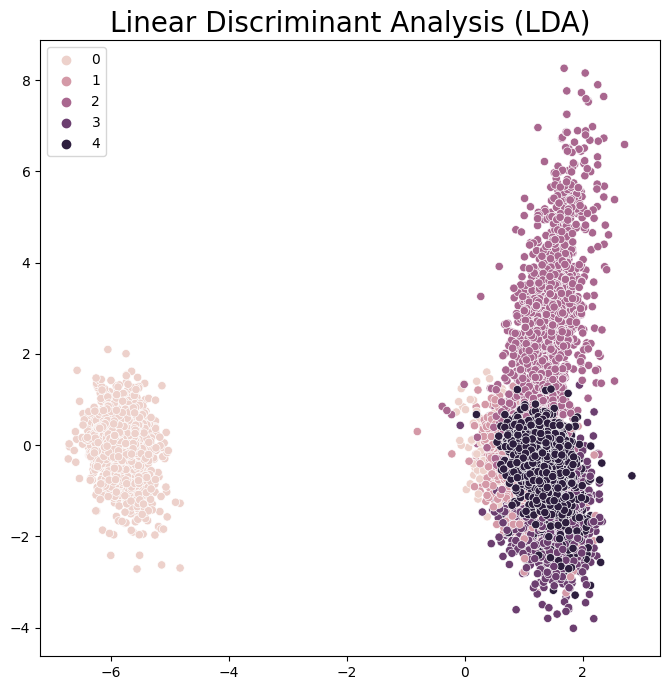

In [ ]:
if LDA_used:
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
  from matplotlib import pyplot as plt
  import seaborn as sns

  lda = LDA()

  if resampling:
    X_LDA = lda.fit_transform(X_resampled_adasyn, y_resampled_adasyn)
    X_test_adasyn, y_test_adasyn = adasyn.fit_resample(X_test_encoded, y_test)
    X_LDA_test = lda.transform(X_test_adasyn)
    y_train = y_resampled_adasyn
  else:
    X_LDA = lda.fit_transform(X_train_encoded, y_train)
    X_LDA_test = lda.transform(X_test_encoded)

  plt.figure(figsize=(8,8))
  sns.scatterplot(x=X_LDA[:,0], y=X_LDA[:,1], hue=y_train)
  plt.title("Linear Discriminant Analysis (LDA)", fontsize=20)
  plt.show()

# Modeling - Version 2

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

if LDA_used == 1:
  X_train = X_LDA
  X_test = X_LDA_test
else:
  X_train = X_train_encoded
  X_test = X_test_encoded

if resampling:
  y_train = y_resampled_adasyn
  y_test = y_test_adasyn


cl2 = DecisionTreeClassifier()
cl2.fit(X_train, y_train)
print("Accuracy score of the Decision Tree Model : ",
      cl2.score(X_test, y_test))
y_pred = cl2.predict(X_test)

display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred))

cl3 = RandomForestClassifier()
cl3.fit(X_train, y_train)
print("Accuracy score of the Random Forest Model : ",
      cl3.score(X_test, y_test))
y_pred = cl3.predict(X_test)

display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred))

gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=0)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred ))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the gradient boost model:", accuracy)

svc = SVC(C= 10, gamma= 0.1, kernel= 'rbf')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred ))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVC model:", accuracy)


#!pip install xgboost
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(colsample_bytree=0.5, gamma=0, learning_rate=0.1,
                           max_depth=3, reg_lambda=0, scale_pos_weight=1, subsample=0.8)
xgb_cl.fit(X_train, y_train)
y_pred = xgb_cl.predict(X_test)

display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred ))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the XGBoost model:", accuracy)


Accuracy score of the Decision Tree Model :  0.6144483706321162


Prediction,0,1,2,3,4
True,,,,,
0,463,25,8,4,12
1,26,249,59,117,83
2,6,42,369,19,64
3,4,128,26,235,121
4,7,74,52,105,249


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       512
           1       0.48      0.47      0.47       534
           2       0.72      0.74      0.73       500
           3       0.49      0.46      0.47       514
           4       0.47      0.51      0.49       487

    accuracy                           0.61      2547
   macro avg       0.61      0.62      0.61      2547
weighted avg       0.61      0.61      0.61      2547

Accuracy score of the Random Forest Model :  0.6839418924224578


Prediction,0,1,2,3,4
True,,,,,
0,463,30,8,0,11
1,9,323,38,89,75
2,4,47,374,15,60
3,2,96,12,312,92
4,3,67,45,102,270


              precision    recall  f1-score   support

           0       0.96      0.90      0.93       512
           1       0.57      0.60      0.59       534
           2       0.78      0.75      0.77       500
           3       0.60      0.61      0.60       514
           4       0.53      0.55      0.54       487

    accuracy                           0.68      2547
   macro avg       0.69      0.68      0.69      2547
weighted avg       0.69      0.68      0.69      2547



Prediction,0,1,2,3,4
True,,,,,
0,465,28,9,1,9
1,15,321,41,79,78
2,5,48,374,13,60
3,5,92,15,308,94
4,4,65,47,91,280


              precision    recall  f1-score   support

           0       0.94      0.91      0.92       512
           1       0.58      0.60      0.59       534
           2       0.77      0.75      0.76       500
           3       0.63      0.60      0.61       514
           4       0.54      0.57      0.56       487

    accuracy                           0.69      2547
   macro avg       0.69      0.69      0.69      2547
weighted avg       0.69      0.69      0.69      2547

Accuracy of the gradient boost model: 0.6862976050255202


Prediction,0,1,2,3,4
True,,,,,
0,463,38,9,0,2
1,0,357,23,74,80
2,0,62,361,15,62
3,1,99,11,314,89
4,1,65,24,97,300


              precision    recall  f1-score   support

           0       1.00      0.90      0.95       512
           1       0.57      0.67      0.62       534
           2       0.84      0.72      0.78       500
           3       0.63      0.61      0.62       514
           4       0.56      0.62      0.59       487

    accuracy                           0.70      2547
   macro avg       0.72      0.70      0.71      2547
weighted avg       0.72      0.70      0.71      2547

Accuracy of the SVC model: 0.7047506870828426
[07:49:32] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.



Prediction,0,1,2,3,4
True,,,,,
0,463,29,12,0,8
1,1,330,35,74,94
2,4,46,377,13,60
3,2,89,14,308,101
4,2,50,48,92,295


              precision    recall  f1-score   support

           0       0.98      0.90      0.94       512
           1       0.61      0.62      0.61       534
           2       0.78      0.75      0.76       500
           3       0.63      0.60      0.62       514
           4       0.53      0.61      0.56       487

    accuracy                           0.70      2547
   macro avg       0.70      0.70      0.70      2547
weighted avg       0.71      0.70      0.70      2547

Accuracy of the XGBoost model: 0.696113074204947


# XGBoost Grid Search - Version 2

In [ ]:

if do_grid_search:
  param_grid = {
      "max_depth": [3, 4, 5, 7],
      "learning_rate": [0.1, 0.01, 0.05],
      "gamma": [0, 0.25, 1],
      "reg_lambda": [0, 1, 10],
      "scale_pos_weight": [1, 3, 5],
      "subsample": [0.8],
      "colsample_bytree": [0.5],
  }

  from sklearn.model_selection import GridSearchCV

  xgb_cl = xgb.XGBClassifier(objective="binary:logistic")
  grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=5, scoring="roc_auc")
  _ = grid_cv.fit(X_train, y_train)
  best_params = grid_cv.best_params_
  best_estimator = grid_cv.best_estimator_
  print("Best Parameters:", grid_cv.best_params_)
  print("Best Score:", grid_cv.best_score_)

# SVC Grid Search - Version 2

In [ ]:
if do_grid_search:
  from sklearn.model_selection import GridSearchCV
  from sklearn.metrics import classification_report
  from sklearn.svm import SVC

  classifier = SVC()

  param_grid = {
      'C': [0.1, 1, 10],
      'kernel': ['linear', 'rbf'],
      'gamma': [0.1, 0.01, 0.001]
      #'class_weight': []
  }

  grid_search = GridSearchCV(classifier, param_grid, cv=5)
  grid_search.fit(X_train, y_train)

  best_params = grid_search.best_params_
  best_estimator = grid_search.best_estimator_
  print("Best Parameters:", grid_search.best_params_)
  print("Best Score:", grid_search.best_score_)

  y_pred = best_estimator.predict(X_test)
  print(classification_report(y_test, y_pred))